## Final Project

### Develop a Simple Data Analysis Application with Machine Learning model

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Pre-Processing of Data

In [2]:
df = pd.read_csv('apple_quality.csv')
df.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality,Lama Membusuk (hari)
0,0,0.75,-2.12,5.72,-1.24,0.41,1.39,0.76,bad,5.95
1,1,-0.21,-0.63,6.12,-0.84,1.40,2.86,-0.92,bad,9.10
2,2,0.97,-0.51,7.17,1.12,2.01,-2.10,0.87,good,11.89
3,3,2.28,-1.20,7.11,0.92,2.05,0.84,1.36,bad,4.18
4,4,-0.35,-0.24,2.24,-0.03,1.55,-0.98,0.41,bad,3.89


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   A_id                  100 non-null    int64  
 1   Size                  100 non-null    float64
 2   Weight                100 non-null    float64
 3   Sweetness             100 non-null    float64
 4   Crunchiness           100 non-null    float64
 5   Juiciness             100 non-null    float64
 6   Ripeness              100 non-null    float64
 7   Acidity               100 non-null    float64
 8   Quality               100 non-null    object 
 9   Lama Membusuk (hari)  100 non-null    float64
dtypes: float64(8), int64(1), object(1)
memory usage: 7.9+ KB


In [4]:
df.isnull().sum()

A_id                    0
Size                    0
Weight                  0
Sweetness               0
Crunchiness             0
Juiciness               0
Ripeness                0
Acidity                 0
Quality                 0
Lama Membusuk (hari)    0
dtype: int64

In [5]:
df.describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Lama Membusuk (hari)
count,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,49.500000,-0.155600,0.033500,5.12940,0.160700,1.944000,-0.173300,0.024500,9.778800
std,29.011492,1.362502,1.430366,2.16881,1.326576,1.063761,1.385708,1.067094,4.122333
min,0.000000,-3.930000,-2.880000,-1.48000,-3.190000,-0.300000,-3.710000,-2.700000,3.580000
25%,24.750000,-0.900000,-1.205000,3.68750,-0.855000,1.105000,-0.982500,-0.605000,6.732500
50%,49.500000,-0.190000,0.125000,5.19500,0.075000,1.925000,-0.165000,-0.040000,8.485000
75%,74.250000,0.607500,0.805000,6.40750,1.025000,2.655000,0.760000,0.722500,13.800000
max,99.000000,2.780000,4.080000,12.71000,3.280000,5.080000,3.410000,2.570000,19.260000


### Dectecting Outliers

In [6]:
# Select only numerical columns for outlier detection
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(numerical_cols)
outliers_iqr = {}

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outlier_indices = df[(df[col] < lower) | (df[col] > upper)].index
    outliers_iqr[col] = outlier_indices.tolist()

# Display summary
for col, indices in outliers_iqr.items():
    if indices:
        print(f"{col}: {len(indices)} outliers")
        print(f"Sample Indices: {indices[:10]}")
        print("-" * 40)

Index(['A_id', 'Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness',
       'Ripeness', 'Acidity', 'Lama Membusuk (hari)'],
      dtype='object')
Size: 1 outliers
Sample Indices: [74]
----------------------------------------
Weight: 1 outliers
Sample Indices: [79]
----------------------------------------
Sweetness: 2 outliers
Sample Indices: [9, 62]
----------------------------------------
Juiciness: 1 outliers
Sample Indices: [78]
----------------------------------------
Ripeness: 2 outliers
Sample Indices: [44, 83]
----------------------------------------
Acidity: 2 outliers
Sample Indices: [46, 68]
----------------------------------------


In [7]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Replace outliers with median using IQR method
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median = df[col].median()

    df.loc[df[col] < lower_bound, col] = median
    df.loc[df[col] > upper_bound, col] = median

print("All outliers have been replaced with median values.")

All outliers have been replaced with median values.


### Data visualization

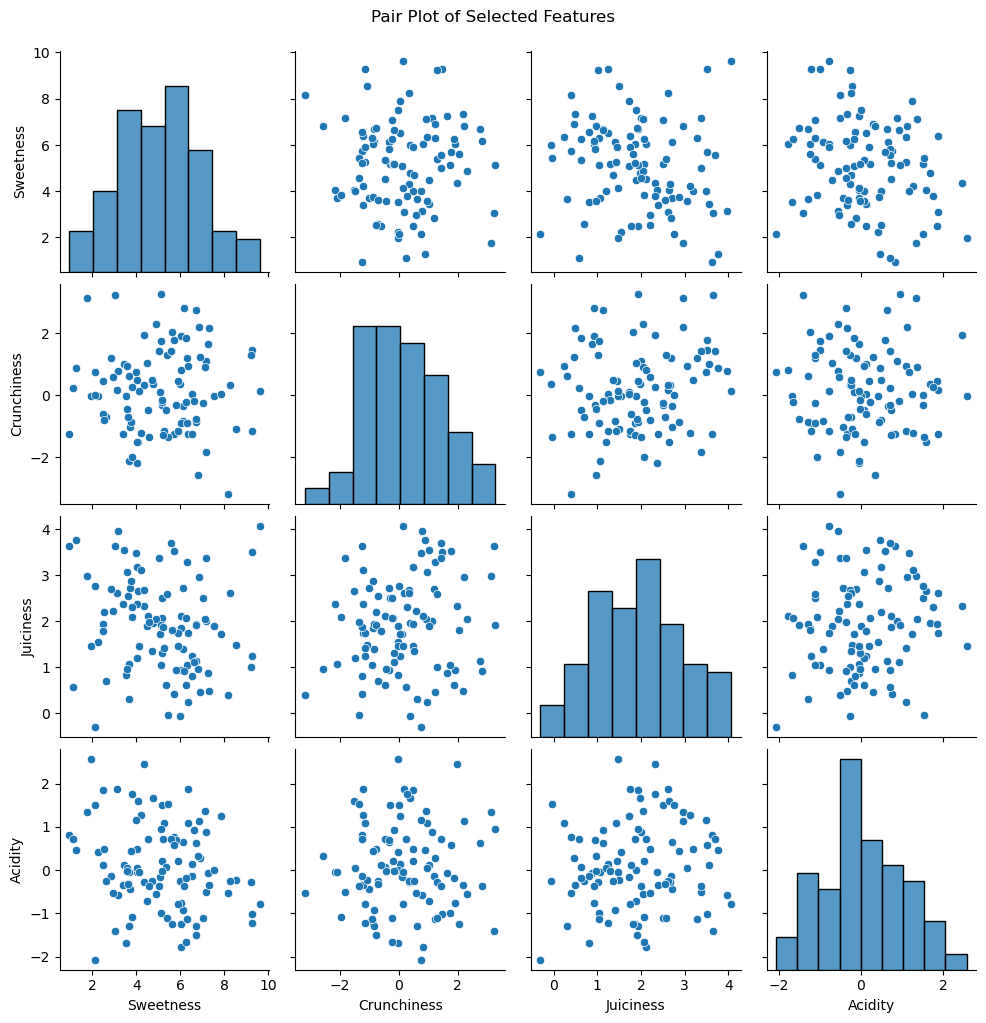

In [10]:
# Pair plot for a subset of columns to visualize pairwise relationships
cols_to_plot = ['Sweetness', 'Crunchiness', 'Juiciness', 'Acidity', 'Quality']
sns.pairplot(df[cols_to_plot])
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()

In [1]:
## Histogram

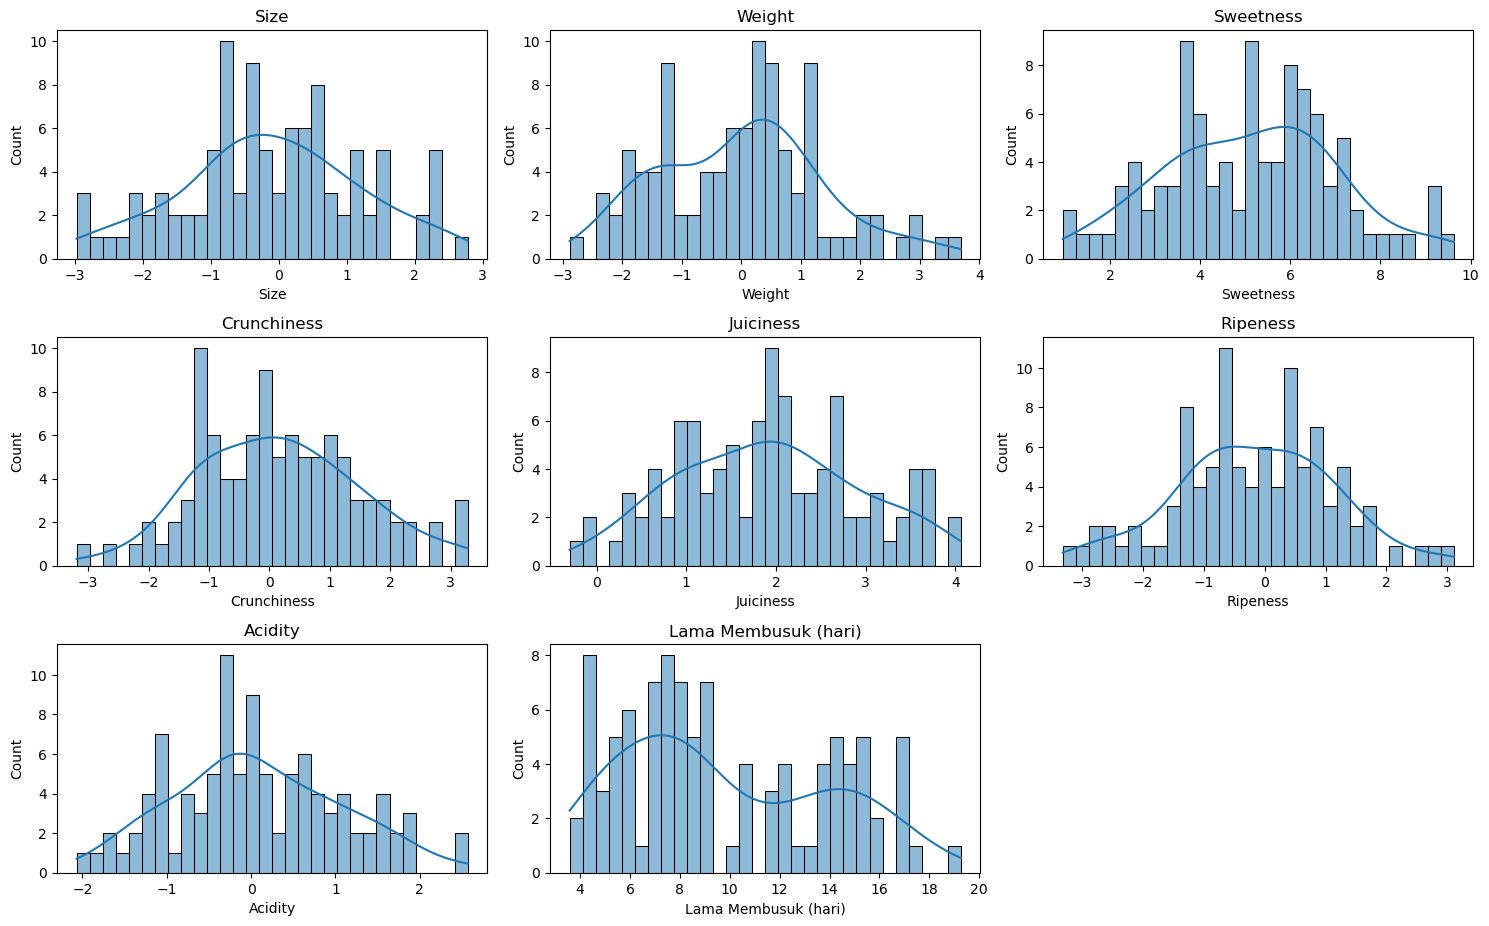

In [30]:
# Histogram plots for each numeric variable
numeric_df = df.select_dtypes(include=[np.number])
numeric_cols = [col for col in df.select_dtypes(include=[np.number]).columns if col.lower() != 'a_id'] 
plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_cols):
    plt.subplot(4, 3, i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

## Correlation Heatmap

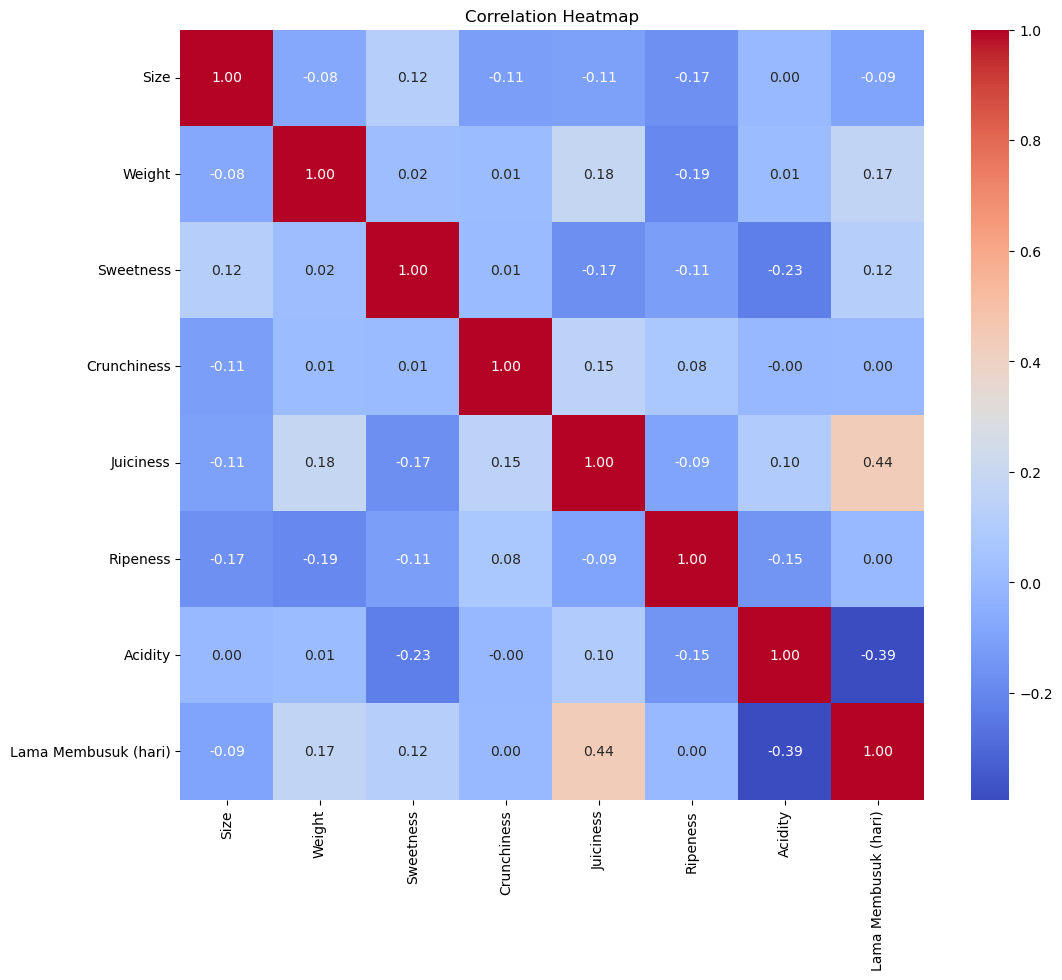

In [32]:
# Correation heatmap
numeric_df = df.select_dtypes(include=[np.number])
if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(12, 10))
    correlation = numeric_df.corr()
    sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.show()
else:
    print('Not enough numeric columns for a correlation heatmap.')

## Count plot

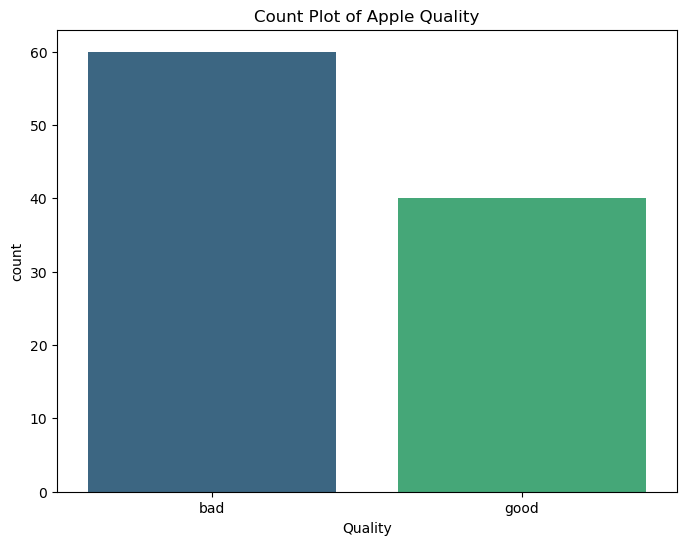

In [34]:
# Count plot for the 'quality' column
plt.figure(figsize=(8, 6))
sns.countplot(x='Quality', data=df, palette='viridis')
plt.title('Count Plot of Apple Quality')
plt.show()

### Predictive Modeling

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [38]:
le_quality = LabelEncoder()
df['Quality'] = le_quality.fit_transform(df['Quality'])
df.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality,Lama Membusuk (hari)
0,0.75,-2.12,5.72,-1.24,0.41,1.39,0.76,0,5.95
1,-0.21,-0.63,6.12,-0.84,1.40,2.86,-0.92,0,9.10
2,0.97,-0.51,7.17,1.12,2.01,-2.10,0.87,1,11.89
3,2.28,-1.20,7.11,0.92,2.05,0.84,1.36,0,4.18
4,-0.35,-0.24,2.24,-0.03,1.55,-0.98,0.41,0,3.89


In [2]:
### Using Random Forest

In [39]:
features = df.drop('Quality', axis=1)  
target = df['Quality']

print('Number of high quality wines:', target.sum())
print('Number of low quality wines:', len(target) - target.sum())

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Import and train the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy Score:', accuracy)

Number of high quality wines: 40
Number of low quality wines: 60
Accuracy Score: 1.0


In [3]:
### Confusion Matrix

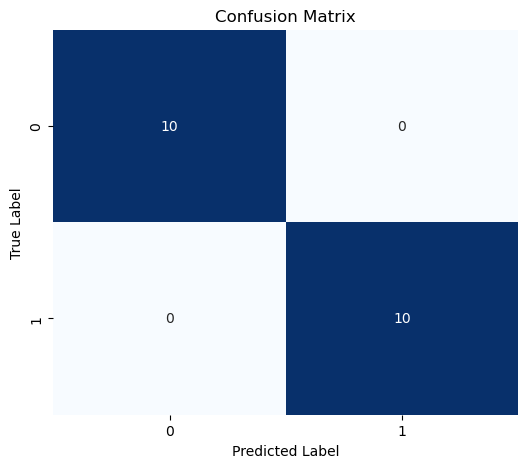

In [41]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### Acutal Value vs predicted Value

In [43]:
actual_quality = le_quality.inverse_transform(y_test)
predicted_quality = le_quality.inverse_transform(y_pred)
result_df = pd.DataFrame({'Actual Quality' : actual_quality, 'Predicted Quality' : predicted_quality})
result_df.head()

,Actual Quality,Predicted Quality
0,0,0
1,1,1
2,0,0
3,1,1
4,0,0
